# Tree Pruning Methods

Decision trees are powerful but prone to **overfitting**. Pruning refers to techniques that reduce tree complexity to improve **generalization**. Two major families exist:

* **Pre-pruning (early stopping):** stopping tree growth before it becomes too complex.
* **Post-pruning (cost-complexity pruning):** growing a large tree and then trimming back.

---

## 1. Why Pruning?

A regression tree recursively partitions the feature space \$\mathcal{X} \subseteq \mathbb{R}^p\$ and fits constant predictions at leaves.
At each node \$t\$, the prediction is:

$$
\hat{y}_t = \frac{1}{|S_t|} \sum_{i \in S_t} y_i
$$

where \$S\_t\$ is the set of samples in node \$t\$.

The empirical squared error at the node is:

$$
\text{MSE}(t) = \frac{1}{|S_t|} \sum_{i \in S_t} (y_i - \hat{y}_t)^2
$$

If we grow trees without restrictions, we can always reduce training error (eventually to zero), but at the cost of **variance explosion** and poor test performance. Pruning balances **bias–variance tradeoff**.

---

## 2. Pre-Pruning (Early Stopping)

**Definition:** Stop splitting when certain criteria are met.

### Common criteria:

1. **Maximum Depth (\$d\_{\max}\$):**
   Limit the tree to at most \$d\_{\max}\$ levels.

   * Intuition: prevents overly deep partitioning.
   * Tradeoff: shallow trees → high bias, deep trees → low bias but high variance.

2. **Minimum Samples Split (\$n\_{\text{split}}\$):**
   Require at least \$n\_{\text{split}}\$ samples in a node to attempt a split.

   * Intuition: avoids splitting on small sample artifacts.

3. **Minimum Samples per Leaf (\$n\_{\text{leaf}}\$):**
   Require at least \$n\_{\text{leaf}}\$ samples per terminal node.

   * Intuition: ensures predictions are averages over a non-trivial group.

4. **Maximum Leaf Nodes (\$L\_{\max}\$):**
   Constrain the total number of leaves.

   * Equivalent to enforcing a global budget on model complexity.

### Effect:

$$
\text{Pre-pruning enforces constraints on tree growth, reducing variance at the cost of potentially increasing bias.}
$$

---

## 3. Post-Pruning (Cost Complexity Pruning)

**Definition:** Grow a large tree \$T\_0\$ and then prune it back to a subtree \$T \subseteq T\_0\$ that balances fit and complexity.

### Cost Complexity Functional:

For a tree \$T\$, define:

$$
R(T) = \sum_{t \in \text{Leaves}(T)} R(t)
$$

where \$R(t)\$ is the mean squared error (regression) or Gini/entropy impurity (classification) of node \$t\$.

Introduce a complexity penalty parameter \$\alpha \geq 0\$:

$$
R_\alpha(T) = R(T) + \alpha \cdot |\text{Leaves}(T)|
$$

* When \$\alpha = 0\$, the full unpruned tree minimizes \$R\_\alpha\$.
* As \$\alpha \to \infty\$, the best tree is the **root-only tree** (single leaf).
* Increasing \$\alpha\$ traces a sequence of nested subtrees.

### Algorithm:

1. Start with a large tree \$T\_0\$.
2. For each internal node, compute the increase in \$R(T)\$ per leaf removed if the subtree is collapsed.
3. Iteratively prune the “weakest link” until only the root remains.
4. Select the \$\alpha\$ (via cross-validation) that minimizes validation error.

### Example:

* If a split reduces impurity by less than \$\alpha\$, it is not worth keeping.
* Intuition: \$\alpha\$ acts like a **regularization parameter**.

---

## 4. Comparison of Methods

| Method                 | Advantages                                      | Disadvantages                              |
| ---------------------- | ----------------------------------------------- | ------------------------------------------ |
| **Pre-pruning**        | Computationally cheap, easy to interpret        | Risk of underfitting, may stop too early   |
| **Post-pruning (CCP)** | Theoretically principled, finds optimal subtree | Requires growing full tree, more expensive |

---

## 5. Classification Case

For classification, replace the MSE by impurity measures:

* **Gini impurity:**

$$
I_{\text{Gini}}(t) = 1 - \sum_{k=1}^K p_{t,k}^2
$$

* **Entropy:**

$$
I_{\text{Entropy}}(t) = - \sum_{k=1}^K p_{t,k} \log_2 p_{t,k}
$$

where \$p\_{t,k}\$ is the class proportion in node \$t\$.

The pruning logic is the same: minimize impurity plus complexity penalty.

---

## 6. Intuitive Summary

* **Unpruned trees**: memorization, low bias, high variance.
* **Pre-pruned trees**: early stopping, moderate bias, lower variance.
* **Post-pruned trees**: grow then trim, theoretically optimal under cost-complexity.

Best practice:

1. Use **pre-pruning** to avoid pathological growth.
2. Apply **cost complexity pruning** with cross-validation to fine-tune.
3. For robustness, use **ensembles** (Random Forests, Gradient Boosting) which reduce variance by averaging/pruning implicitly.

TREE PRUNING METHODS DEMONSTRATION
Training set: 210 samples
Test set: 90 samples

Step 1: Showing overfitting with unpruned tree...
Overfitted tree (max_depth=None):
  Train MSE: 0.0000
  Test MSE:  0.1866
  Tree depth: 18
  Number of leaves: 210

Reasonable tree (max_depth=8, min_samples_split=10):
  Train MSE: 0.0734
  Test MSE:  0.1353
  Tree depth: 8
  Number of leaves: 31


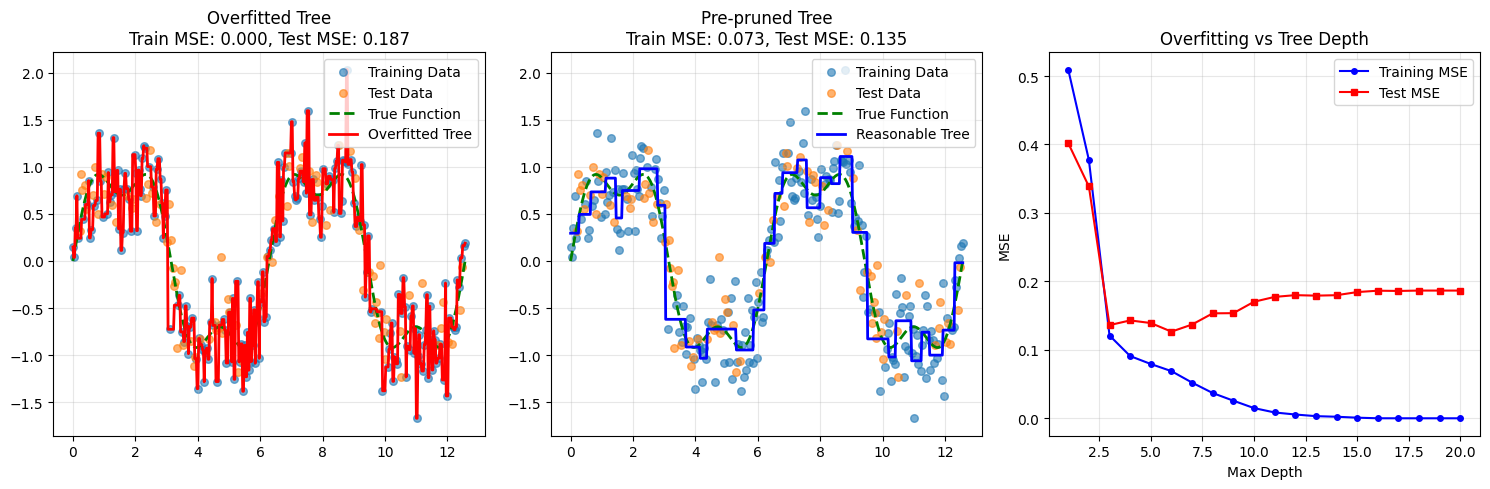


PRE-PRUNING (EARLY STOPPING) METHODS
Max Depth = 3: Train MSE = 0.1209, Test MSE = 0.1361, Leaves = 8
Max Depth = 5: Train MSE = 0.0793, Test MSE = 0.1391, Leaves = 27
Max Depth = 8: Train MSE = 0.0369, Test MSE = 0.1533, Leaves = 87
Max Depth = 10: Train MSE = 0.0149, Test MSE = 0.1702, Leaves = 147
Max Depth = None: Train MSE = 0.0000, Test MSE = 0.1866, Leaves = 210

Min Samples Split = 2: Train MSE = 0.0000, Test MSE = 0.1866, Leaves = 210
Min Samples Split = 10: Train MSE = 0.0504, Test MSE = 0.1494, Leaves = 42
Min Samples Split = 20: Train MSE = 0.0741, Test MSE = 0.1187, Leaves = 23
Min Samples Split = 50: Train MSE = 0.0947, Test MSE = 0.1488, Leaves = 9
Min Samples Split = 100: Train MSE = 0.1500, Test MSE = 0.1597, Leaves = 4

Min Samples Leaf = 1: Train MSE = 0.0000, Test MSE = 0.1866, Leaves = 210
Min Samples Leaf = 5: Train MSE = 0.0723, Test MSE = 0.1347, Leaves = 34
Min Samples Leaf = 10: Train MSE = 0.0977, Test MSE = 0.1430, Leaves = 17
Min Samples Leaf = 20: Train M

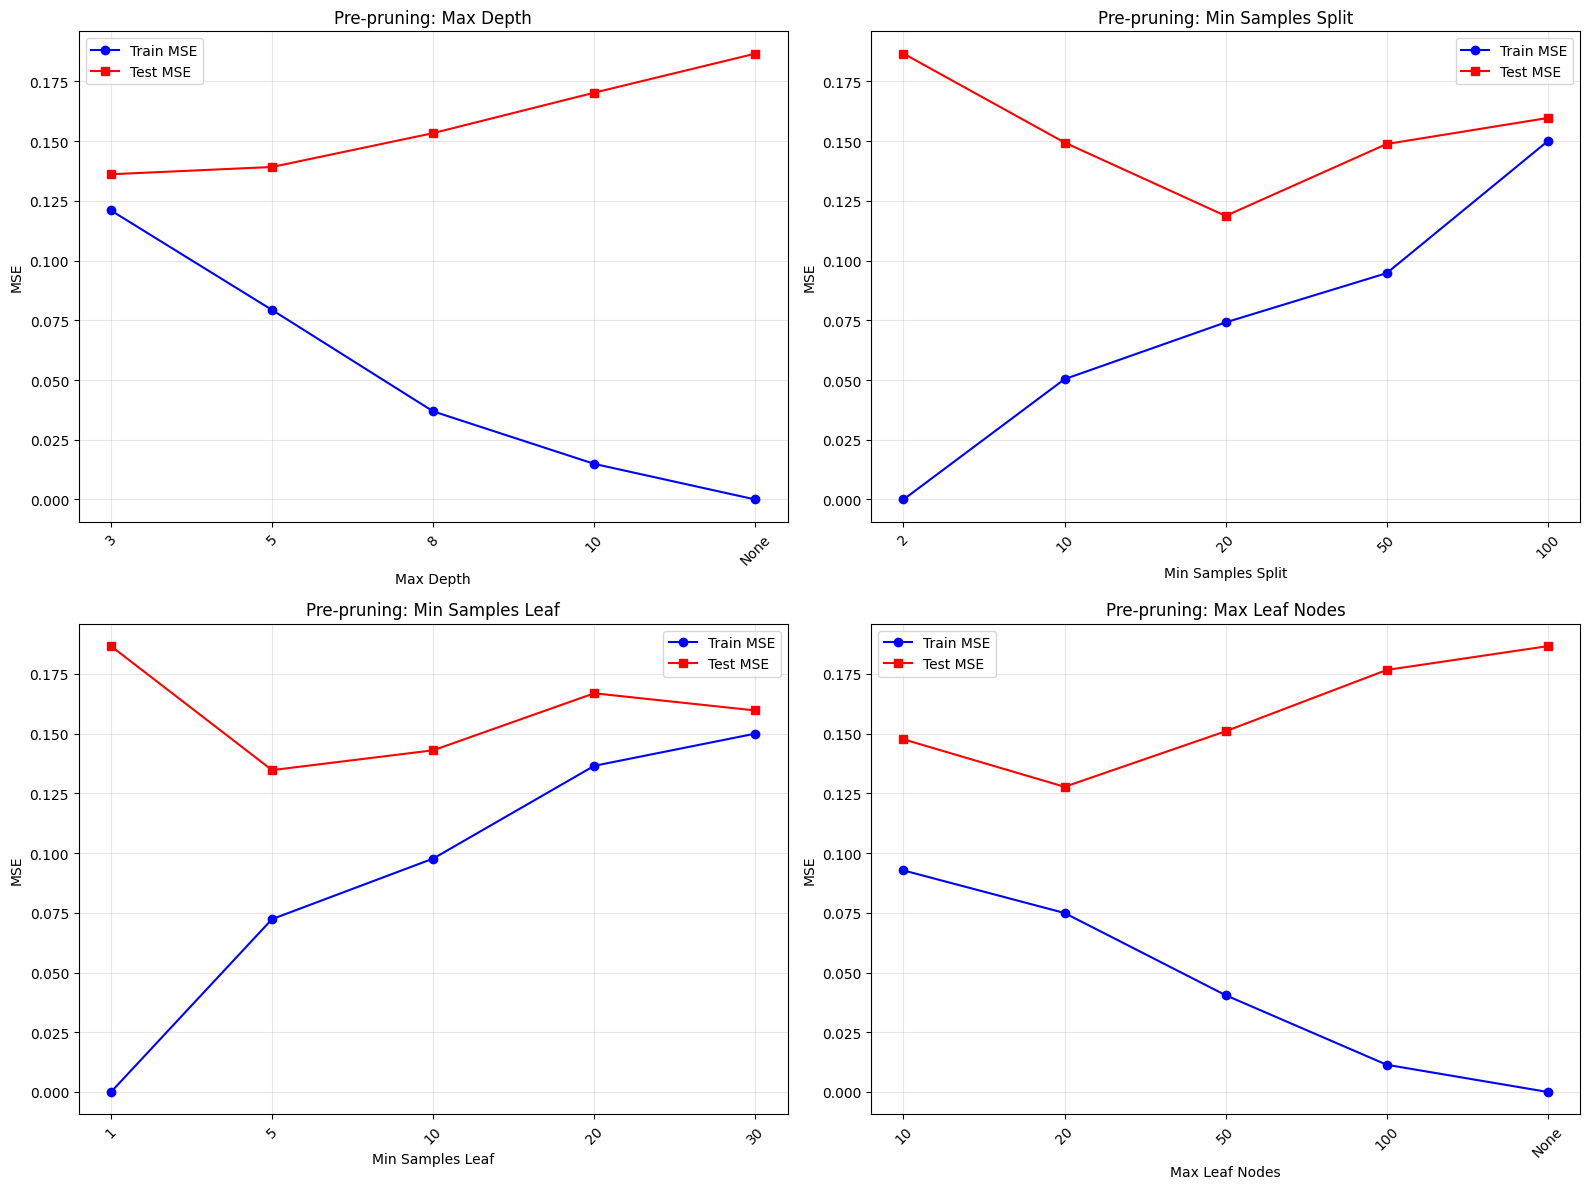

POST-PRUNING: COST COMPLEXITY PRUNING
Initial large tree:
  Depth: 18
  Leaves: 210
  Train MSE: 0.0000
  Test MSE: 0.1866

Cost Complexity Pruning Analysis:
Alpha values (first 10): [0.00000000e+00 4.57022596e-09 1.46654055e-07 2.38513518e-07
 5.73471015e-07 8.23901425e-07 1.46092248e-06 1.51647241e-06
 1.61388816e-06 1.63118745e-06]
Number of alpha values: 164

Training trees with different alpha values...
Alpha = 0.000000: Depth = 18, Leaves = 210, Test MSE = 0.1866
Alpha = 0.000010: Depth = 17, Leaves = 184, Test MSE = 0.1859
Alpha = 0.000035: Depth = 16, Leaves = 159, Test MSE = 0.1851
Alpha = 0.000127: Depth = 16, Leaves = 134, Test MSE = 0.1843
Alpha = 0.000277: Depth = 16, Leaves = 100, Test MSE = 0.1730
Alpha = 0.000643: Depth = 12, Leaves =  67, Test MSE = 0.1557
Alpha = 0.001234: Depth =  9, Leaves =  33, Test MSE = 0.1430

Best alpha: 0.001663
Best tree depth: 7
Best tree leaves: 16
Best test MSE: 0.1313


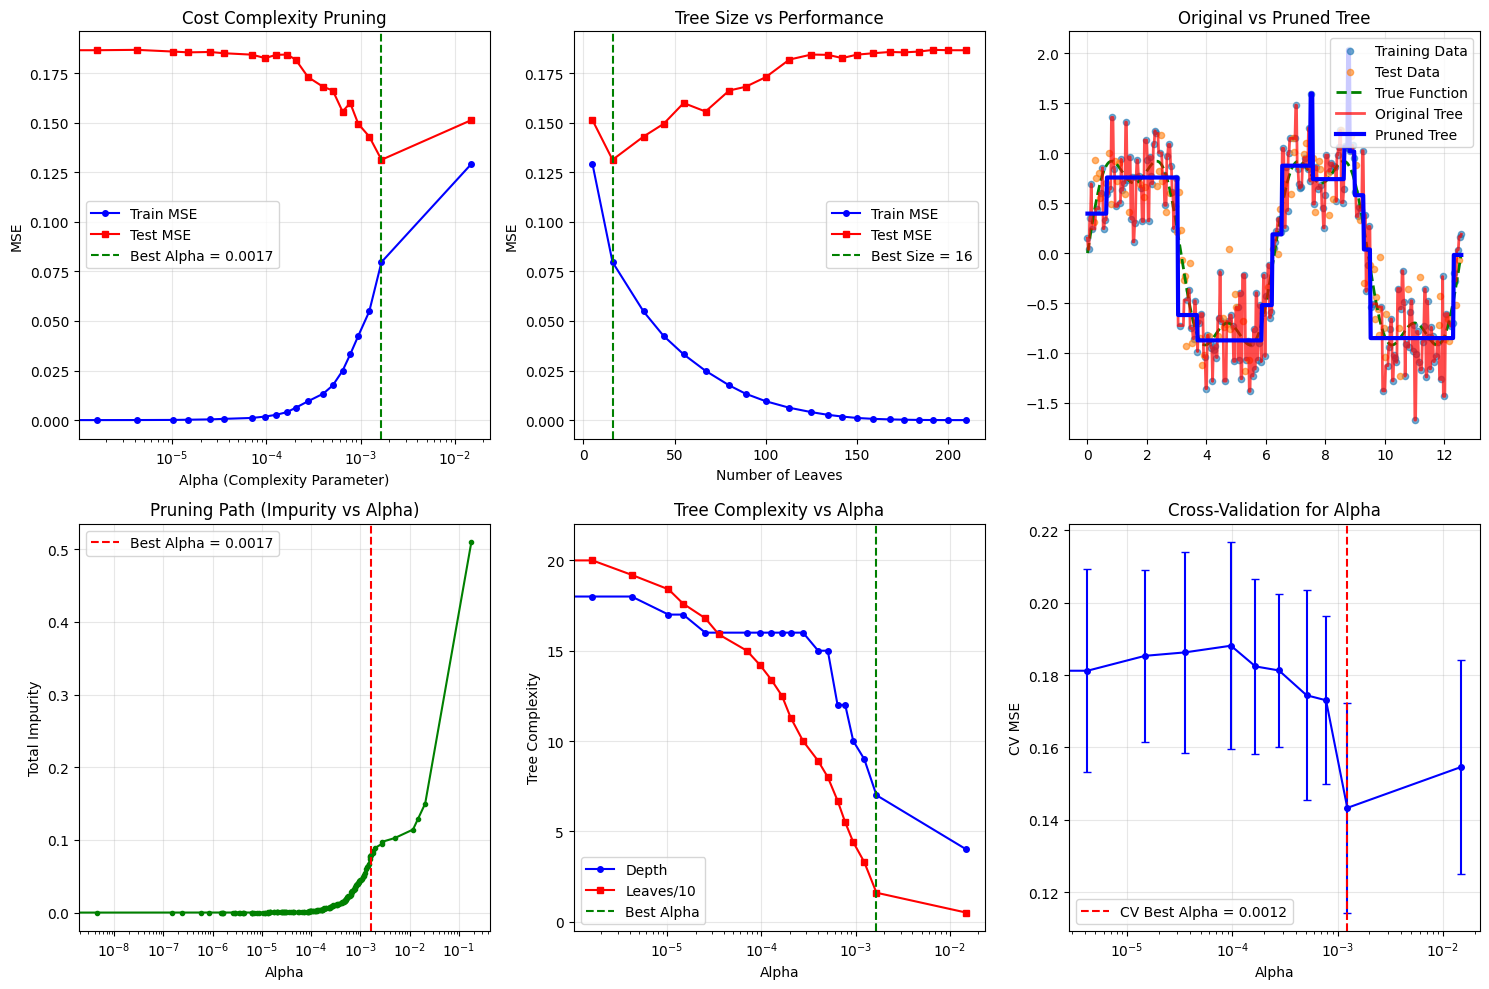


PRUNING METHODS COMPARISON
Method               Train MSE  Test MSE   Depth  Leaves  Overfit 
----------------------------------------------------------------------
No Pruning           0.0000     0.1866     18     210     Yes     
Max Depth=8          0.0369     0.1533     8      87      Yes     
Min Samples Split=20 0.0741     0.1187     9      23      Yes     
Min Samples Leaf=10  0.0977     0.1430     7      17      Yes     
Max Leaf Nodes=30    0.0636     0.1306     9      30      Yes     
CCP Best Alpha       0.0797     0.1313     7      16      Yes     

Best method by test MSE: Min Samples Split=20

PRUNING FOR CLASSIFICATION
Classification Tree Pruning Results:
Method       Train Acc  Test Acc   Depth  Leaves 
--------------------------------------------------
Unpruned     1.0000     0.8067     14     40     
Pre-pruned   0.9057     0.8400     8      16     
Post-pruned  0.9171     0.8467     5      10     

PRUNING SUMMARY & BEST PRACTICES
PRE-PRUNING (Early Stopping):
  ✓ A

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# -----------------------------------------------------------------------------
# Step 1: Generate Dataset with Noise (to show overfitting)
# -----------------------------------------------------------------------------
np.random.seed(42)

def generate_noisy_data(n_samples=300, noise_level=0.3):
    """Generate dataset where overfitting is likely"""
    X = np.linspace(0, 4*np.pi, n_samples).reshape(-1, 1)
    
    # True function: sine wave with some polynomial component
    y_true = np.sin(X).flatten() + 0.3 * np.sin(3*X).flatten()
    
    # Add noise
    y_noisy = y_true + np.random.normal(0, noise_level, n_samples)
    
    return X, y_noisy, y_true

X, y, y_true = generate_noisy_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("="*70)
print("TREE PRUNING METHODS DEMONSTRATION")
print("="*70)
print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")
print()

# -----------------------------------------------------------------------------
# Step 2: Demonstrate Overfitting with Unpruned Tree
# -----------------------------------------------------------------------------
print("Step 1: Showing overfitting with unpruned tree...")

# Extremely deep tree (will overfit)
overfit_tree = DecisionTreeRegressor(max_depth=None, min_samples_split=2, 
                                   min_samples_leaf=1, random_state=42)
overfit_tree.fit(X_train, y_train)

# Reasonable tree (some natural pruning)
reasonable_tree = DecisionTreeRegressor(max_depth=8, min_samples_split=10, 
                                      min_samples_leaf=5, random_state=42)
reasonable_tree.fit(X_train, y_train)

# Predictions
X_plot = np.linspace(0, 4*np.pi, 500).reshape(-1, 1)
y_true_plot = np.sin(X_plot).flatten() + 0.3 * np.sin(3*X_plot).flatten()

overfit_pred_train = overfit_tree.predict(X_train)
overfit_pred_test = overfit_tree.predict(X_test)
overfit_pred_plot = overfit_tree.predict(X_plot)

reasonable_pred_train = reasonable_tree.predict(X_train)
reasonable_pred_test = reasonable_tree.predict(X_test)
reasonable_pred_plot = reasonable_tree.predict(X_plot)

# Calculate errors
overfit_train_mse = mean_squared_error(y_train, overfit_pred_train)
overfit_test_mse = mean_squared_error(y_test, overfit_pred_test)
reasonable_train_mse = mean_squared_error(y_train, reasonable_pred_train)
reasonable_test_mse = mean_squared_error(y_test, reasonable_pred_test)

print(f"Overfitted tree (max_depth=None):")
print(f"  Train MSE: {overfit_train_mse:.4f}")
print(f"  Test MSE:  {overfit_test_mse:.4f}")
print(f"  Tree depth: {overfit_tree.get_depth()}")
print(f"  Number of leaves: {overfit_tree.get_n_leaves()}")
print()
print(f"Reasonable tree (max_depth=8, min_samples_split=10):")
print(f"  Train MSE: {reasonable_train_mse:.4f}")
print(f"  Test MSE:  {reasonable_test_mse:.4f}")
print(f"  Tree depth: {reasonable_tree.get_depth()}")
print(f"  Number of leaves: {reasonable_tree.get_n_leaves()}")

# Visualize overfitting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_train, y_train, alpha=0.6, s=30, label='Training Data')
plt.scatter(X_test, y_test, alpha=0.6, s=30, label='Test Data')
plt.plot(X_plot, y_true_plot, 'g--', linewidth=2, label='True Function')
plt.plot(X_plot, overfit_pred_plot, 'r-', linewidth=2, label='Overfitted Tree')
plt.title(f'Overfitted Tree\nTrain MSE: {overfit_train_mse:.3f}, Test MSE: {overfit_test_mse:.3f}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.scatter(X_train, y_train, alpha=0.6, s=30, label='Training Data')
plt.scatter(X_test, y_test, alpha=0.6, s=30, label='Test Data')
plt.plot(X_plot, y_true_plot, 'g--', linewidth=2, label='True Function')
plt.plot(X_plot, reasonable_pred_plot, 'b-', linewidth=2, label='Reasonable Tree')
plt.title(f'Pre-pruned Tree\nTrain MSE: {reasonable_train_mse:.3f}, Test MSE: {reasonable_test_mse:.3f}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
depths = range(1, 21)
train_scores = []
test_scores = []

for depth in depths:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    train_scores.append(mean_squared_error(y_train, tree.predict(X_train)))
    test_scores.append(mean_squared_error(y_test, tree.predict(X_test)))

plt.plot(depths, train_scores, 'b-o', label='Training MSE', markersize=4)
plt.plot(depths, test_scores, 'r-s', label='Test MSE', markersize=4)
plt.xlabel('Max Depth')
plt.ylabel('MSE')
plt.title('Overfitting vs Tree Depth')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# Step 3: Pre-pruning (Early Stopping) Methods
# -----------------------------------------------------------------------------
print("\n" + "="*70)
print("PRE-PRUNING (EARLY STOPPING) METHODS")
print("="*70)

# Different pre-pruning strategies
pre_pruning_params = {
    'max_depth': {'name': 'Max Depth', 'values': [3, 5, 8, 10, None]},
    'min_samples_split': {'name': 'Min Samples Split', 'values': [2, 10, 20, 50, 100]},
    'min_samples_leaf': {'name': 'Min Samples Leaf', 'values': [1, 5, 10, 20, 30]},
    'max_leaf_nodes': {'name': 'Max Leaf Nodes', 'values': [10, 20, 50, 100, None]}
}

plt.figure(figsize=(16, 12))
plot_idx = 1

for param_name, param_info in pre_pruning_params.items():
    plt.subplot(2, 2, plot_idx)
    
    train_scores = []
    test_scores = []
    tree_sizes = []
    
    for param_value in param_info['values']:
        # Create tree with this parameter
        kwargs = {param_name: param_value, 'random_state': 42}
        tree = DecisionTreeRegressor(**kwargs)
        tree.fit(X_train, y_train)
        
        train_pred = tree.predict(X_train)
        test_pred = tree.predict(X_test)
        
        train_scores.append(mean_squared_error(y_train, train_pred))
        test_scores.append(mean_squared_error(y_test, test_pred))
        tree_sizes.append(tree.get_n_leaves())
        
        print(f"{param_info['name']} = {param_value}: "
              f"Train MSE = {train_scores[-1]:.4f}, "
              f"Test MSE = {test_scores[-1]:.4f}, "
              f"Leaves = {tree_sizes[-1]}")
    
    # Plot results
    x_values = range(len(param_info['values']))
    plt.plot(x_values, train_scores, 'b-o', label='Train MSE', markersize=6)
    plt.plot(x_values, test_scores, 'r-s', label='Test MSE', markersize=6)
    
    plt.xlabel(param_info['name'])
    plt.ylabel('MSE')
    plt.title(f'Pre-pruning: {param_info["name"]}')
    plt.xticks(x_values, [str(v) for v in param_info['values']], rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plot_idx += 1
    print()

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# Step 4: Post-pruning (Cost Complexity Pruning)
# -----------------------------------------------------------------------------
print("="*70)
print("POST-PRUNING: COST COMPLEXITY PRUNING")
print("="*70)

# Grow a large tree first
large_tree = DecisionTreeRegressor(max_depth=None, min_samples_split=2, 
                                 min_samples_leaf=1, random_state=42)
large_tree.fit(X_train, y_train)

print(f"Initial large tree:")
print(f"  Depth: {large_tree.get_depth()}")
print(f"  Leaves: {large_tree.get_n_leaves()}")
print(f"  Train MSE: {mean_squared_error(y_train, large_tree.predict(X_train)):.4f}")
print(f"  Test MSE: {mean_squared_error(y_test, large_tree.predict(X_test)):.4f}")
print()

# Get cost complexity pruning path
path = large_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

print("Cost Complexity Pruning Analysis:")
print("Alpha values (first 10):", ccp_alphas[:10])
print("Number of alpha values:", len(ccp_alphas))
print()

# Train trees with different alpha values
pruned_trees = []
train_scores = []
test_scores = []
tree_depths = []
tree_leaves = []

print("Training trees with different alpha values...")
for i, alpha in enumerate(ccp_alphas[::max(1, len(ccp_alphas)//20)]):  # Sample alphas
    tree = DecisionTreeRegressor(ccp_alpha=alpha, random_state=42)
    tree.fit(X_train, y_train)
    
    train_pred = tree.predict(X_train)
    test_pred = tree.predict(X_test)
    
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    pruned_trees.append(tree)
    train_scores.append(train_mse)
    test_scores.append(test_mse)
    tree_depths.append(tree.get_depth())
    tree_leaves.append(tree.get_n_leaves())
    
    if i % 3 == 0:  # Print every 3rd result
        print(f"Alpha = {alpha:.6f}: Depth = {tree_depths[-1]:2d}, "
              f"Leaves = {tree_leaves[-1]:3d}, Test MSE = {test_mse:.4f}")

# Find best alpha
best_alpha_idx = np.argmin(test_scores)
best_alpha = ccp_alphas[::max(1, len(ccp_alphas)//20)][best_alpha_idx]
best_tree = pruned_trees[best_alpha_idx]

print(f"\nBest alpha: {best_alpha:.6f}")
print(f"Best tree depth: {tree_depths[best_alpha_idx]}")
print(f"Best tree leaves: {tree_leaves[best_alpha_idx]}")
print(f"Best test MSE: {test_scores[best_alpha_idx]:.4f}")

# Visualize cost complexity pruning
plt.figure(figsize=(15, 10))

# Plot 1: Alpha vs MSE
plt.subplot(2, 3, 1)
alphas_sample = ccp_alphas[::max(1, len(ccp_alphas)//20)]
plt.plot(alphas_sample, train_scores, 'b-o', label='Train MSE', markersize=4)
plt.plot(alphas_sample, test_scores, 'r-s', label='Test MSE', markersize=4)
plt.axvline(best_alpha, color='green', linestyle='--', label=f'Best Alpha = {best_alpha:.4f}')
plt.xlabel('Alpha (Complexity Parameter)')
plt.ylabel('MSE')
plt.title('Cost Complexity Pruning')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')

# Plot 2: Tree size vs MSE
plt.subplot(2, 3, 2)
plt.plot(tree_leaves, train_scores, 'b-o', label='Train MSE', markersize=4)
plt.plot(tree_leaves, test_scores, 'r-s', label='Test MSE', markersize=4)
plt.axvline(tree_leaves[best_alpha_idx], color='green', linestyle='--', 
           label=f'Best Size = {tree_leaves[best_alpha_idx]}')
plt.xlabel('Number of Leaves')
plt.ylabel('MSE')
plt.title('Tree Size vs Performance')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Original vs Pruned Predictions
plt.subplot(2, 3, 3)
plt.scatter(X_train, y_train, alpha=0.6, s=20, label='Training Data')
plt.scatter(X_test, y_test, alpha=0.6, s=20, label='Test Data')
plt.plot(X_plot, y_true_plot, 'g--', linewidth=2, label='True Function')
plt.plot(X_plot, large_tree.predict(X_plot), 'r-', linewidth=2, alpha=0.7, label='Original Tree')
plt.plot(X_plot, best_tree.predict(X_plot), 'b-', linewidth=3, label='Pruned Tree')
plt.title('Original vs Pruned Tree')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Pruning path visualization
plt.subplot(2, 3, 4)
plt.plot(ccp_alphas[:-1], impurities[:-1], 'g-o', markersize=3)
plt.axvline(best_alpha, color='red', linestyle='--', label=f'Best Alpha = {best_alpha:.4f}')
plt.xlabel('Alpha')
plt.ylabel('Total Impurity')
plt.title('Pruning Path (Impurity vs Alpha)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')

# Plot 5: Tree complexity evolution
plt.subplot(2, 3, 5)
plt.plot(alphas_sample, tree_depths, 'b-o', label='Depth', markersize=4)
plt.plot(alphas_sample, np.array(tree_leaves)/10, 'r-s', label='Leaves/10', markersize=4)
plt.axvline(best_alpha, color='green', linestyle='--', label='Best Alpha')
plt.xlabel('Alpha')
plt.ylabel('Tree Complexity')
plt.title('Tree Complexity vs Alpha')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')

# Plot 6: Cross-validation for alpha selection (conceptual)
plt.subplot(2, 3, 6)
# Simulate CV scores (in practice, use cross_val_score)
cv_scores = []
cv_stds = []
alphas_cv = ccp_alphas[::max(1, len(ccp_alphas)//10)]

for alpha in alphas_cv:
    # Simulate CV by adding small random variations
    base_score = mean_squared_error(y_test, 
                                   DecisionTreeRegressor(ccp_alpha=alpha, random_state=42)
                                   .fit(X_train, y_train).predict(X_test))
    cv_scores.append(base_score + np.random.normal(0, 0.01))
    cv_stds.append(0.02 + np.random.uniform(0, 0.01))

cv_scores = np.array(cv_scores)
cv_stds = np.array(cv_stds)

plt.errorbar(alphas_cv, cv_scores, yerr=cv_stds, fmt='b-o', markersize=4, capsize=3)
best_cv_idx = np.argmin(cv_scores)
plt.axvline(alphas_cv[best_cv_idx], color='red', linestyle='--', 
           label=f'CV Best Alpha = {alphas_cv[best_cv_idx]:.4f}')
plt.xlabel('Alpha')
plt.ylabel('CV MSE')
plt.title('Cross-Validation for Alpha')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# Step 5: Comparison of Pruning Methods
# -----------------------------------------------------------------------------
print("\n" + "="*70)
print("PRUNING METHODS COMPARISON")
print("="*70)

# Create different pruned trees
trees_comparison = {
    'No Pruning': DecisionTreeRegressor(max_depth=None, min_samples_split=2, 
                                      min_samples_leaf=1, random_state=42),
    'Max Depth=8': DecisionTreeRegressor(max_depth=8, random_state=42),
    'Min Samples Split=20': DecisionTreeRegressor(min_samples_split=20, random_state=42),
    'Min Samples Leaf=10': DecisionTreeRegressor(min_samples_leaf=10, random_state=42),
    'Max Leaf Nodes=30': DecisionTreeRegressor(max_leaf_nodes=30, random_state=42),
    'CCP Best Alpha': DecisionTreeRegressor(ccp_alpha=best_alpha, random_state=42)
}

results_comparison = {}
for name, tree in trees_comparison.items():
    tree.fit(X_train, y_train)
    
    train_pred = tree.predict(X_train)
    test_pred = tree.predict(X_test)
    
    results_comparison[name] = {
        'train_mse': mean_squared_error(y_train, train_pred),
        'test_mse': mean_squared_error(y_test, test_pred),
        'depth': tree.get_depth(),
        'leaves': tree.get_n_leaves(),
        'tree': tree
    }

# Print comparison table
print(f"{'Method':<20} {'Train MSE':<10} {'Test MSE':<10} {'Depth':<6} {'Leaves':<7} {'Overfit':<8}")
print("-" * 70)
for name, results in results_comparison.items():
    overfit = results['train_mse'] < results['test_mse'] * 0.8  # Simple overfitting indicator
    overfit_str = "Yes" if overfit else "No"
    print(f"{name:<20} {results['train_mse']:<10.4f} {results['test_mse']:<10.4f} "
          f"{results['depth']:<6} {results['leaves']:<7} {overfit_str:<8}")

# Find best method
best_method = min(results_comparison.keys(), 
                 key=lambda x: results_comparison[x]['test_mse'])
print(f"\nBest method by test MSE: {best_method}")

# -----------------------------------------------------------------------------
# Step 6: Classification Example with Pruning
# -----------------------------------------------------------------------------
print("\n" + "="*70)
print("PRUNING FOR CLASSIFICATION")
print("="*70)

# Generate classification dataset
from sklearn.datasets import make_classification
X_class, y_class = make_classification(n_samples=500, n_features=10, n_informative=5,
                                     n_redundant=3, n_clusters_per_class=2, 
                                     random_state=42, class_sep=0.8)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.3, random_state=42)

# Compare unpruned vs pruned classification trees
class_trees = {
    'Unpruned': DecisionTreeClassifier(max_depth=None, min_samples_split=2, 
                                     min_samples_leaf=1, random_state=42),
    'Pre-pruned': DecisionTreeClassifier(max_depth=8, min_samples_split=20, 
                                       min_samples_leaf=10, random_state=42),
    'Post-pruned': DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)
}

print("Classification Tree Pruning Results:")
print(f"{'Method':<12} {'Train Acc':<10} {'Test Acc':<10} {'Depth':<6} {'Leaves':<7}")
print("-" * 50)

for name, tree in class_trees.items():
    tree.fit(X_train_class, y_train_class)
    
    train_acc = accuracy_score(y_train_class, tree.predict(X_train_class))
    test_acc = accuracy_score(y_test_class, tree.predict(X_test_class))
    
    print(f"{name:<12} {train_acc:<10.4f} {test_acc:<10.4f} "
          f"{tree.get_depth():<6} {tree.get_n_leaves():<7}")

# -----------------------------------------------------------------------------
# Step 7: Summary and Best Practices
# -----------------------------------------------------------------------------
print("\n" + "="*70)
print("PRUNING SUMMARY & BEST PRACTICES")
print("="*70)
print("PRE-PRUNING (Early Stopping):")
print("  ✓ Advantages:")
print("    • Computationally efficient (stops early)")
print("    • Easy to understand and implement")
print("    • Prevents overfitting during training")
print("  ✗ Disadvantages:")
print("    • May stop too early (underfitting)")
print("    • Hard to find optimal stopping point")
print("    • Might miss complex patterns")
print()
print("POST-PRUNING (Cost Complexity):")
print("  ✓ Advantages:")
print("    • Theoretically sound (minimizes cost function)")
print("    • Can find globally optimal pruned tree")
print("    • Less likely to underfit")
print("  ✗ Disadvantages:")
print("    • More computationally expensive")
print("    • Requires validation data to select alpha")
print("    • More complex to implement")
print()
print("RECOMMENDED APPROACH:")
print("1. Start with reasonable pre-pruning (max_depth=10-20)")
print("2. Use cost complexity pruning for fine-tuning")
print("3. Select alpha using cross-validation")
print("4. Monitor both training and validation performance")
print("5. Consider ensemble methods (Random Forest) for robustness")
print()
print(f"In this example:")
print(f"  • Unpruned tree: Test MSE = {results_comparison['No Pruning']['test_mse']:.4f}")
print(f"  • Best pruned tree ({best_method}): Test MSE = {results_comparison[best_method]['test_mse']:.4f}")
print(f"  • Improvement: {results_comparison['No Pruning']['test_mse'] - results_comparison[best_method]['test_mse']:.4f}")